### Practical Example

#### Importing the relevant libraries

In [138]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

#### Loading the raw data

In [139]:
raw_data = pd.read_csv("./datasets/1.04. Real-life example.csv")
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


#### Preprocessing

##### Exploring the discriptive statistics of the variables

In [140]:
raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


#### Determining the variables of interest

In [141]:
## data = raw_data.drop(["Model"], axis=1)
## data.describe(include='all')

#### Dealing with missing values

In [142]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [143]:
data_no_mv = raw_data.dropna(axis=0)

In [144]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.00,4025,4025.00,4025.00,4025,4025,4025.00,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.31,NaN,163.57,2.76,NaN,NaN,2006.38,NaN
std,NaN,25815.73,NaN,103.39,4.94,NaN,NaN,6.70,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,90.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00,NaN
75%,NaN,21900.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


#### Exploring the PDFs

d:\Codes\ZTM Machine Learning, Data science\Sample_Project\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

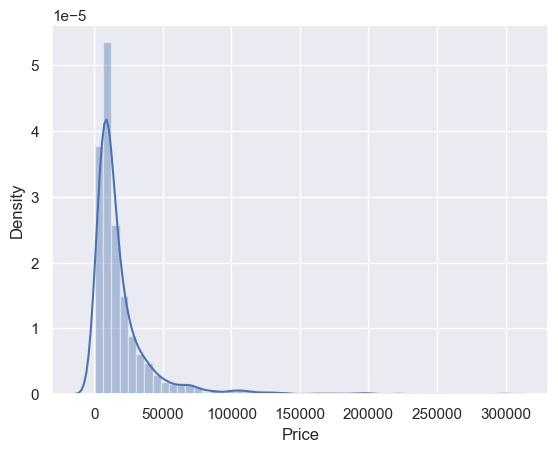

In [145]:
sns.distplot(data_no_mv["Price"])

#### Dealing with outliers

In [146]:
q = data_no_mv["Price"].quantile(0.99)
data_1 = data_no_mv[data_no_mv["Price"]<q]
data_1.describe()

,Price,Mileage,EngineV,Year
count,3984.00,3984.00,3984.00,3984.00
mean,17837.12,165.12,2.74,2006.29
std,18976.27,102.77,4.96,6.67
min,600.00,0.00,0.60,1969.00
25%,6980.00,93.00,1.80,2002.75
50%,11400.00,160.00,2.20,2007.00
75%,21000.00,230.00,3.00,2011.00
max,129222.00,980.00,99.99,2016.00


d:\Codes\ZTM Machine Learning, Data science\Sample_Project\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

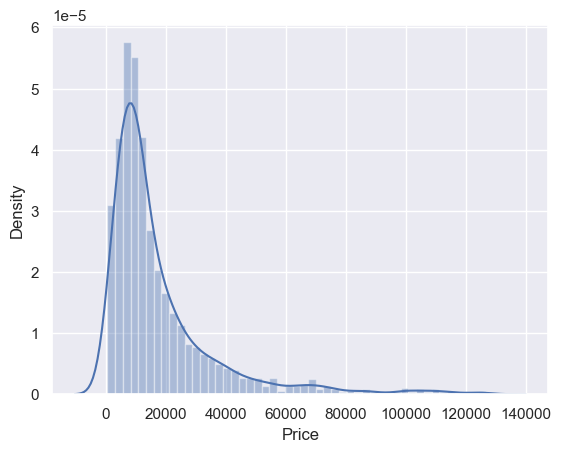

In [147]:
sns.distplot(data_1["Price"])

d:\Codes\ZTM Machine Learning, Data science\Sample_Project\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

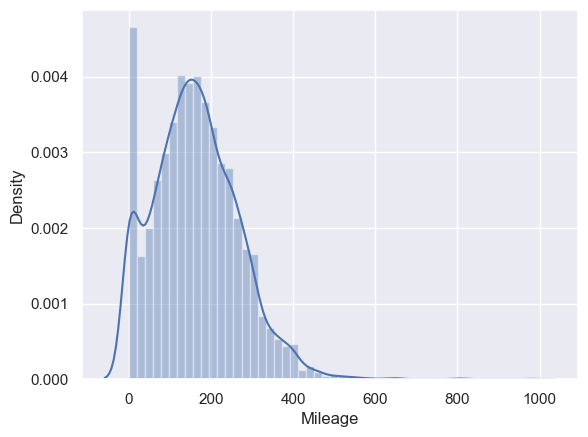

In [148]:
sns.distplot(data_no_mv["Mileage"])

In [149]:
q = data_1["Mileage"].quantile(0.99)
data_2 = data_1[data_1["Mileage"]<q]

d:\Codes\ZTM Machine Learning, Data science\Sample_Project\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

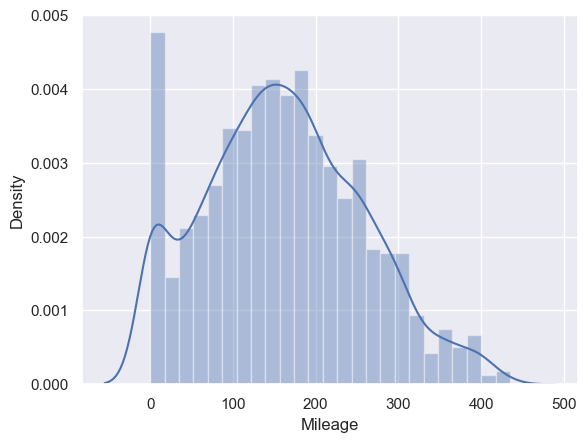

In [150]:
sns.distplot(data_2["Mileage"])

d:\Codes\ZTM Machine Learning, Data science\Sample_Project\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

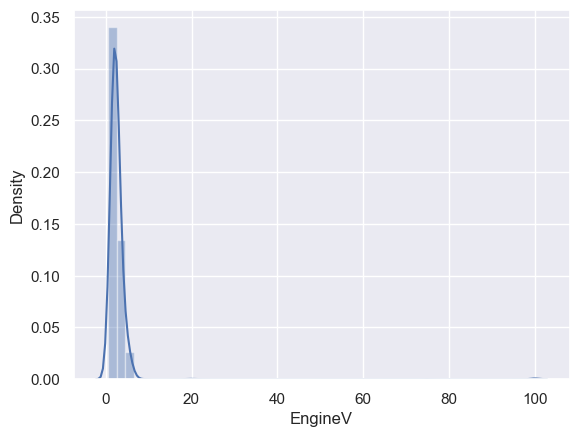

In [151]:
sns.distplot(data_no_mv["EngineV"])

In [152]:
data_3 = data_2[data_2["EngineV"]<6.5]

d:\Codes\ZTM Machine Learning, Data science\Sample_Project\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

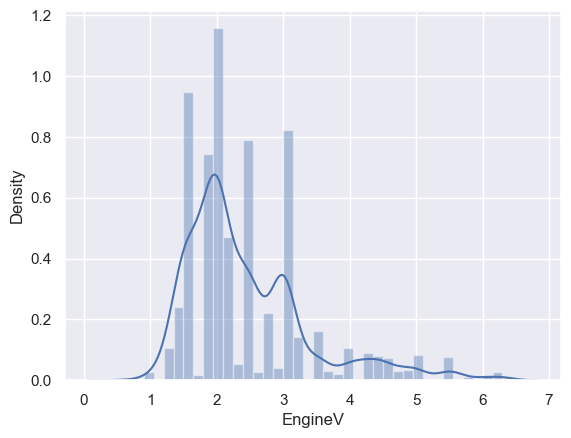

In [153]:
sns.distplot(data_3["EngineV"])

d:\Codes\ZTM Machine Learning, Data science\Sample_Project\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

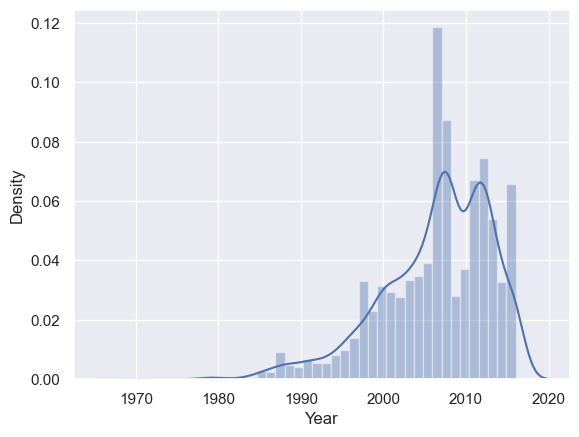

In [154]:
sns.distplot(data_no_mv["Year"])

In [155]:
q = data_3["Year"].quantile(0.01)
data_4 = data_3[data_3["Year"]>q]

d:\Codes\ZTM Machine Learning, Data science\Sample_Project\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

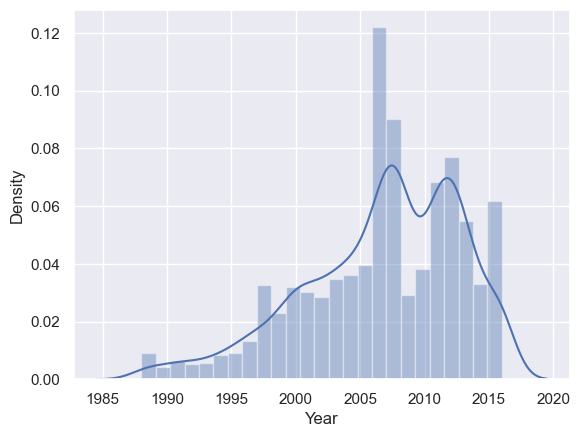

In [156]:
sns.distplot(data_4["Year"])

In [157]:
data_cleaned = data_4.reset_index(drop=True)

In [158]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,T5 (Transporter)
3863,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,Corolla
3864,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,S 350
3865,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,535


In [159]:
data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71,NaN
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10,NaN
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00,NaN
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00,NaN


### Checking the OLS assumptions

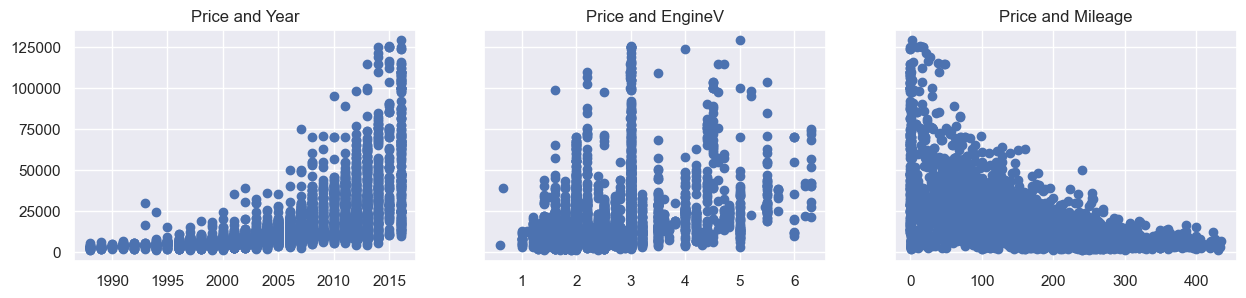

In [160]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned["Year"], data_cleaned["Price"])
ax1.set_title("Price and Year")
ax2.scatter(data_cleaned["EngineV"], data_cleaned["Price"])
ax2.set_title("Price and EngineV")
ax3.scatter(data_cleaned["Mileage"], data_cleaned["Price"])
ax3.set_title("Price and Mileage")

plt.show()

d:\Codes\ZTM Machine Learning, Data science\Sample_Project\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

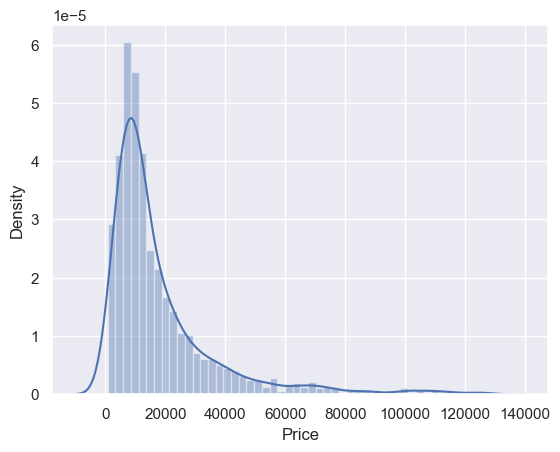

In [161]:
sns.distplot(data_cleaned["Price"])

#### Relaxing the assumptions

In [162]:
log_price = np.log(data_cleaned["Price"])
data_cleaned["log_price"] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4,9.81
...,...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,T5 (Transporter),9.35
3863,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,Corolla,9.79
3864,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,S 350,11.74
3865,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,535,8.78


##### Plots with log price

d:\Codes\ZTM Machine Learning, Data science\Sample_Project\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_price', ylabel='Density'>

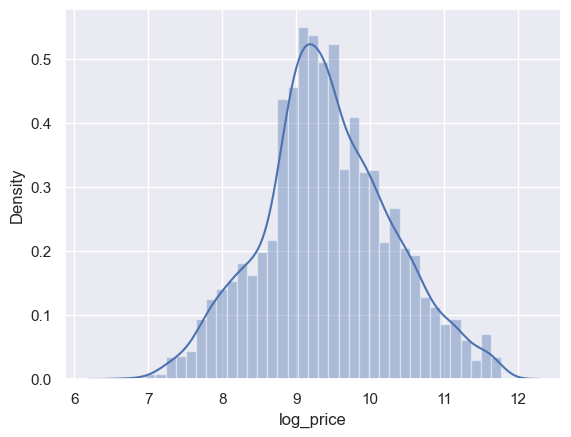

In [163]:
sns.distplot(data_cleaned["log_price"])

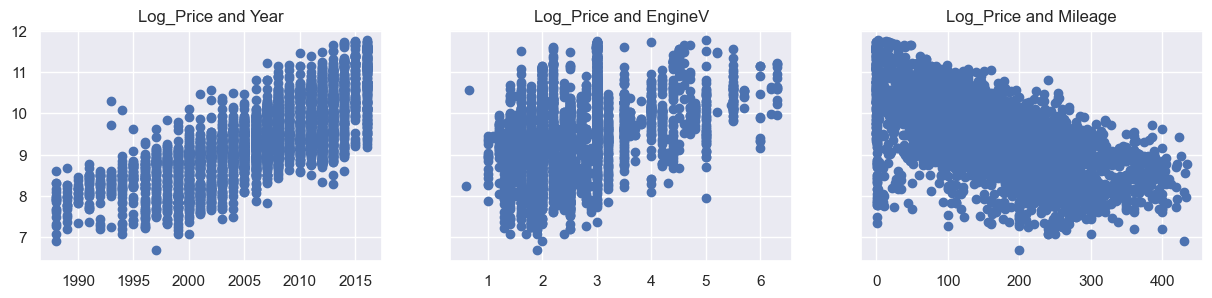

In [164]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned["Year"], data_cleaned["log_price"])
ax1.set_title("Log_Price and Year")
ax2.scatter(data_cleaned["EngineV"], data_cleaned["log_price"])
ax2.set_title("Log_Price and EngineV")
ax3.scatter(data_cleaned["Mileage"], data_cleaned["log_price"])
ax3.set_title("Log_Price and Mileage")

plt.show()

In [165]:
data_cleaned = data_cleaned.drop(["Price"], axis=1)

#### Multicollinearity

In [166]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_price'], dtype=object)

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[["Mileage", "Year", "EngineV"]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [168]:
vif

,VIF,features
0,3.79,Mileage
1,10.35,Year
2,7.66,EngineV


In [169]:
data_no_multicollinearity = data_cleaned.drop(["Year"], axis=1 )

#### Create dummy variables

In [170]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [171]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.00,8.34,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.90,8.97,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.00,9.50,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.20,10.04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.00,9.81,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Rearrange a bit

In [172]:

data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_73

In [173]:
cols = [ 'log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745',
       'Model_750', 'Model_760', 'Model_80', 'Model_9', 'Model_90',
       'Model_A 140', 'Model_A 150', 'Model_A 170', 'Model_A 180',
       'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5',
       'Model_A6', 'Model_A6 Allroad', 'Model_A7', 'Model_A8',
       'Model_ASX', 'Model_Amarok', 'Model_Auris', 'Model_Avalon',
       'Model_Avensis', 'Model_Aygo', 'Model_B 170', 'Model_B 180',
       'Model_B 200', 'Model_Beetle', 'Model_Bora', 'Model_C-Class',
       'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG', 'Model_CL 550',
       'Model_CL 63 AMG', 'Model_CLA 200', 'Model_CLA 220',
       'Model_CLA-Class', 'Model_CLC 180', 'Model_CLC 200',
       'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230', 'Model_CLK 240',
       'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430', 'Model_CLS 350',
       'Model_CLS 400', 'Model_CLS 500', 'Model_CLS 63 AMG',
       'Model_Caddy', 'Model_Camry', 'Model_Captur', 'Model_Caravelle',
       'Model_Carina', 'Model_Carisma', 'Model_Celica', 'Model_Clio',
       'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 350', 'Model_G 500', 'Model_G 55 AMG',
       'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350', 'Model_GL 420',
       'Model_GL 450', 'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class',
       'Model_GLE-Class', 'Model_GLK 220', 'Model_GLK 300',
       'Model_GLS 350', 'Model_GLS 400', 'Model_Galant', 'Model_Golf GTI',
       'Model_Golf II', 'Model_Golf III', 'Model_Golf IV',
       'Model_Golf Plus', 'Model_Golf V', 'Model_Golf VI',
       'Model_Golf VII', 'Model_Golf Variant', 'Model_Grand Scenic',
       'Model_Grandis', 'Model_Hiace', 'Model_Highlander', 'Model_Hilux',
       'Model_I3', 'Model_IQ', 'Model_Jetta', 'Model_Kangoo',
       'Model_Koleos', 'Model_L 200', 'Model_LT', 'Model_Laguna',
       'Model_Lancer', 'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Logan',
       'Model_Lupo', 'Model_M5', 'Model_M6', 'Model_MB', 'Model_ML 250',
       'Model_ML 270', 'Model_ML 280', 'Model_ML 320', 'Model_ML 350',
       'Model_ML 400', 'Model_ML 430', 'Model_ML 500', 'Model_ML 550',
       'Model_ML 63 AMG', 'Model_Master', 'Model_Matrix', 'Model_Megane',
       'Model_Modus', 'Model_Multivan', 'Model_New Beetle',
       'Model_Outlander', 'Model_Outlander XL', 'Model_Pajero',
       'Model_Pajero Pinin', 'Model_Pajero Sport', 'Model_Pajero Wagon',
       'Model_Passat B3', 'Model_Passat B4', 'Model_Passat B5',
       'Model_Passat B6', 'Model_Passat B7', 'Model_Passat B8',
       'Model_Passat CC', 'Model_Phaeton', 'Model_Pointer', 'Model_Polo',
       'Model_Previa', 'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7',
       'Model_R 320', 'Model_R8', 'Model_Rav 4', 'Model_S 140',
       'Model_S 250', 'Model_S 300', 'Model_S 320', 'Model_S 350',
       'Model_S 400', 'Model_S 430', 'Model_S 500', 'Model_S 550',
       'Model_S 600', 'Model_S 63 AMG', 'Model_S 65 AMG', 'Model_S4',
       'Model_S5', 'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
       'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
       'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan', 'Model_Sienna',
       'Model_Smart', 'Model_Space Star', 'Model_Space Wagon',
       'Model_Sprinter 208', 'Model_Sprinter 210', 'Model_Sprinter 211',
       'Model_Sprinter 212', 'Model_Sprinter 213', 'Model_Sprinter 311',
       'Model_Sprinter 312', 'Model_Sprinter 313', 'Model_Sprinter 315',
       'Model_Sprinter 316', 'Model_Sprinter 318', 'Model_Sprinter 319',
       'Model_Symbol', 'Model_Syncro', 'Model_T3 (Transporter)',
       'Model_T4 (Transporter)', 'Model_T4 (Transporter) ',
       'Model_T5 (Transporter)', 'Model_T5 (Transporter) ',
       'Model_T6 (Transporter)', 'Model_T6 (Transporter) ', 'Model_TT',
       'Model_Tacoma', 'Model_Tiguan', 'Model_Touareg', 'Model_Touran',
       'Model_Trafic', 'Model_Tundra', 'Model_Up', 'Model_V 250',
       'Model_Vaneo', 'Model_Vento', 'Model_Venza', 'Model_Viano',
       'Model_Virage', 'Model_Vista', 'Model_Vito', 'Model_X1',
       'Model_X3', 'Model_X5', 'Model_X5 M', 'Model_X6', 'Model_X6 M',
       'Model_Yaris', 'Model_Z3', 'Model_Z4']

In [174]:
data_preprocessed = data_with_dummies[cols]

In [175]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.34,277,2.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.97,427,2.90,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.50,358,5.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.04,240,4.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.81,120,2.00,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Linear Regression Model

#### Declare the inputs and the targets

In [176]:
targets = data_preprocessed["log_price"]
inputs = data_preprocessed.drop(["log_price"], axis = 1)

#### Scale the data

In [177]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [178]:
inputs_scaled = scaler.transform(inputs)

#### Train Test Split

In [179]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

#### Create the regression

In [180]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [181]:
y_hat = reg.predict(x_train)

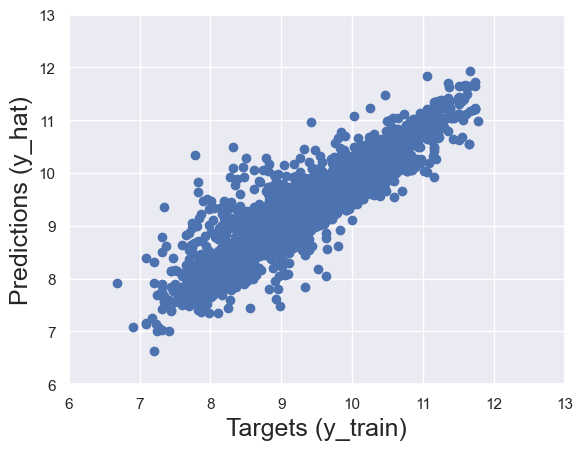

In [182]:
plt.scatter(y_train, y_hat )
plt.xlabel("Targets (y_train)", size=18)
plt.ylabel("Predictions (y_hat)", size=18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

d:\Codes\ZTM Machine Learning, Data science\Sample_Project\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

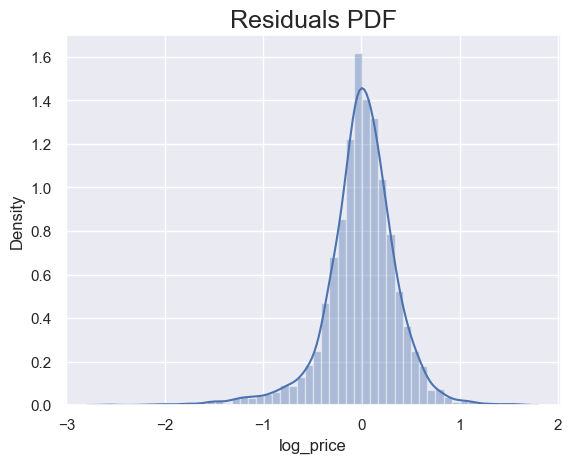

In [183]:
sns.distplot(y_train-y_hat)
plt.title("Residuals PDF", size = 18)

In [184]:
reg.score(x_train, y_train)

0.8242269514119577

#### Finding the weights and bias

In [185]:
reg.intercept_

54367323147.68875

In [186]:
reg.coef_

array([-3.61089394e-01,  2.21827158e-02,  2.76284095e+11,  2.97703119e+11,
       -4.55103093e+09,  3.05486565e+12, -1.23694943e+12, -1.62615913e+12,
       -5.81871426e-02, -1.35498047e-02, -6.39648438e-02, -5.57861328e-02,
       -1.94091797e-02, -9.88769531e-02, -2.31323242e-02, -1.20605469e-01,
        3.13537598e-01,  4.66851634e+10, -2.64833957e+12,  3.90319824e-02,
        3.77807617e-02, -4.86755371e-03, -2.03408013e+11,  1.29394531e-02,
        1.57318115e-02,  7.44628906e-03,  2.74658203e-02,  9.03320312e-03,
       -1.43849791e+11, -1.44004822e-03,  1.88674927e-02,  1.16271973e-02,
        4.86488342e-02,  1.03729248e-01,  4.60535869e+12,  2.47192383e-02,
        3.14941406e-02,  4.20837402e-02, -1.07810555e+13,  2.82058716e-02,
        1.38854980e-02,  3.15814703e+12,  2.81982422e-02,  4.03747559e-02,
        1.56906128e-01,  5.20019531e-02, -1.26853051e+13,  6.50329590e-02,
        6.56127930e-02,  9.93499756e-02,  7.84606934e-02,  3.02124023e-02,
       -2.25504730e+12,  

In [187]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ["Features"])
reg_summary["Weights"] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.36
1,EngineV,0.02
2,Brand_BMW,276284094779.32
3,Brand_Mercedes-Benz,297703119062.64
4,Brand_Mitsubishi,-4551030932.57
...,...,...
302,Model_X6,0.17
303,Model_X6 M,0.05
304,Model_Yaris,266902261261.86
305,Model_Z3,0.01


##### For Continuous variables -
* If the weight is positive then the price increase when the variable increases

* If the weight is negative then the price decreases when the variable increases

##### For the dummies it's a bit different. Let's see -

In [188]:
data_cleaned["Brand"].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

Here in the `reg_summary` table, we have all the brands except `Audi`. Which means `Audi` is the benchmark.

* If a brand has positive weight, then all things equal, car price of that brand will be more
* If a brand has negative weight, then all things equal, car price of that brand will be less

*  In our case, `Mercedes` has a weight of almost zero. As our dummies are scaled, we cannot be sure that `Mercedes` are actually more expensive than `Audi`, but in this case it seems to be more expensive  

* #### As our weights are standardized, we can see that which is more significant.
    * `Mileage` has almost twice the strength of `EngineV`


* #### It does not make sense to compare the weights of continuous variables and dummies. Dummies weights are relative to a benchmark variables. 

### Testing

In [189]:
y_hat_test = reg.predict(x_test)

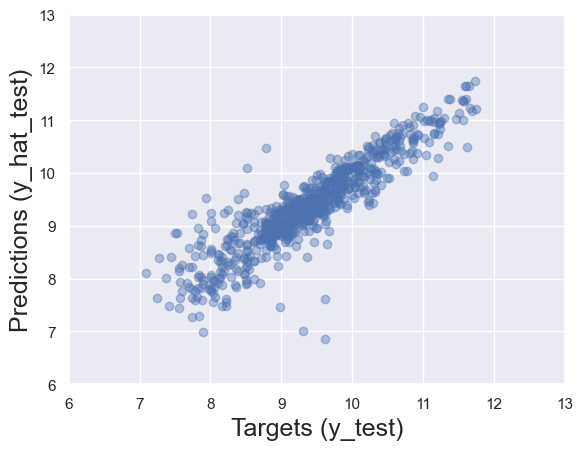

In [190]:
plt.scatter(y_test, y_hat_test, alpha=0.4)
plt.xlabel("Targets (y_test)", size=18)
plt.ylabel("Predictions (y_hat_test)", size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [191]:
y_hat_test

array([ 9.22693634e+00,  5.22996087e+14,  8.64234161e+00,  8.90998077e+00,
        9.32178497e+00, -8.50068475e+13,  8.13535600e+14,  9.47046661e+00,
        9.35614777e+00,  1.06867752e+01,  8.69464874e+00,  8.39234161e+00,
        7.45642853e+00,  9.63379669e+00,  9.04273224e+00,  9.46955109e+00,
        1.01206131e+01,  9.34943390e+00,  1.04330521e+01,  9.51978302e+00,
        9.28174591e+00,  1.01399002e+01,  8.53589630e+00,  9.31421661e+00,
        9.84156036e+00,  1.02966385e+01,  8.15406036e+00,  8.40094757e+00,
        1.04250565e+01,  1.08575516e+01,  9.31018829e+00,  9.09387970e+00,
       -4.74182704e+14,  9.78076935e+00,  9.98218536e+00,  9.69727325e+00,
        9.43433380e+00,  1.03210526e+01,  9.55402374e+00,  1.03552322e+01,
        9.92823029e+00,  9.82642365e+00,  1.07669754e+01,  9.80988312e+00,
        9.23493195e+00,  9.01569366e+00,  8.48242950e+00,  1.02075272e+01,
        1.07328568e+01,  8.22876740e+00,  7.83399200e+00,  7.84058380e+00,
        9.20874786e+00,  

In [192]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=["Predictions"])
df_pf.head()

C:\Users\Fayaz\AppData\Local\Temp\ipykernel_8480\1662582847.py:1: RuntimeWarning: overflow encountered in exp
  df_pf = pd.DataFrame(np.exp(y_hat_test), columns=["Predictions"])


,Predictions
0,10167.34
1,inf
2,5666.58
3,7405.52
4,11178.92


In [193]:
y_hat_test.shape

(774,)

In [194]:
df_pf["Target"] = np.exp(y_test)
df_pf.head()

,Predictions,Target
0,10167.34,NaN
1,inf,7900.00
2,5666.58,NaN
3,7405.52,NaN
4,11178.92,NaN


In [195]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0   7.74
1   7.94
2   7.82
3   8.76
4   9.12
Name: log_price, dtype: float64

In [196]:
df_pf["Target"] = np.exp(y_test)
df_pf.head()

,Predictions,Target
0,10167.34,2300.00
1,inf,2800.00
2,5666.58,2500.00
3,7405.52,6400.00
4,11178.92,9150.00


In [197]:
df_pf["Residual"] = df_pf["Target"] - df_pf["Predictions"]

In [198]:
df_pf["Difference%"] = np.absolute(df_pf["Residual"]/df_pf["Target"]*100)
df_pf

,Predictions,Target,Residual,Difference%
0,10167.34,2300.00,-7867.34,342.06
1,inf,2800.00,-inf,inf
2,5666.58,2500.00,-3166.58,126.66
3,7405.52,6400.00,-1005.52,15.71
4,11178.92,9150.00,-2028.92,22.17
...,...,...,...,...
769,37806.25,29500.00,-8306.25,28.16
770,8993.48,9600.00,606.52,6.32
771,14640.70,18300.00,3659.30,20.00
772,20778.17,68500.00,47721.83,69.67


In [199]:
df_pf.describe()

,Predictions,Target,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,inf,18165.82,-inf,inf
std,NaN,19967.86,NaN,NaN
min,0.00,1200.00,-inf,0.07
25%,7148.39,6900.00,-2124.01,8.50
50%,11472.36,11600.00,81.95,19.60
75%,20034.39,20500.00,2358.07,35.24
max,inf,126000.00,76194.83,inf


In [200]:
pd.options.display.max_rows=99
pd.set_option("display.float_format", lambda x: "%.2f" % x)
df_pf.sort_values(by=["Difference%"])

,Predictions,Target,Residual,Difference%
758,7944.48,7950.00,5.52,0.07
622,4204.88,4200.00,-4.88,0.12
638,7290.26,7300.00,9.74,0.13
450,13481.06,13500.00,18.94,0.14
736,43252.59,43163.25,-89.34,0.21
...,...,...,...,...
98,inf,8500.00,-inf,inf
722,inf,18900.00,-inf,inf
366,inf,6999.00,-inf,inf
264,inf,42000.00,-inf,inf
